In [56]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import os

In [70]:
photo_dir = './photos/'
photo_paths = os.listdir(photo_dir)
photos = [
    plt.imread(photo_dir + path, format='jpeg')[:,500:3500,1] / 255
    for path in photo_paths
]

In [71]:
sp.fft.fft2(photos[0]).real

array([[2413206.54509804, -261926.79528342, -220752.95148129, ...,
         -68198.82985995, -220752.95148129, -261926.79528342],
       [-449519.86337414,  487515.05193304,  225454.66963692, ...,
         -40939.23174339,   29504.23635634, -645805.1431474 ],
       [-238697.77588077,   12226.63606893,  -63519.83409831, ...,
         144278.38534111, -101528.31675886,  243563.7568405 ],
       ...,
       [-174026.54015879,   18900.13701238,  138867.11963982, ...,
          38692.55639347,   64212.06668223,   45040.38066971],
       [-238697.77588077,  243563.7568405 , -101528.31675886, ...,
        -105417.43296442,  -63519.83409831,   12226.63606893],
       [-449519.86337414, -645805.1431474 ,   29504.23635634, ...,
          20667.99880017,  225454.66963692,  487515.05193304]])

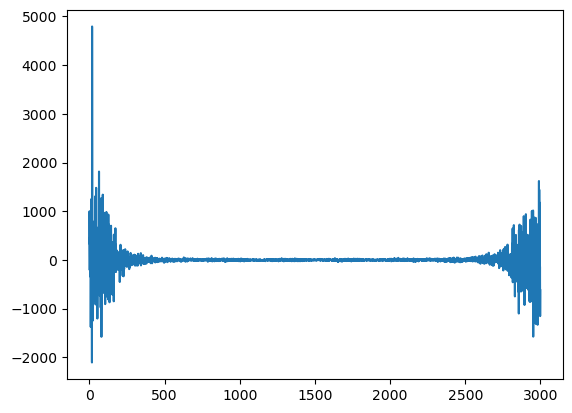

In [72]:
plt.plot(sp.fft.fft2(photos[0]).real[100])

In [73]:
np.std(sp.fft.fft2(photos[0]).real)

972.972938690126

In [74]:
w = 3000
xx = np.arange(w)
x, y = np.meshgrid(xx, xx)
def beam(x0, y0, sigma, power, amplitude=1, offset=0):
    r2 = (x-x0)**2 + (y-y0)**2
    g = offset + amplitude*np.exp(-(r2/(2*sigma**2))**power)
    return g.ravel().reshape(w,w)

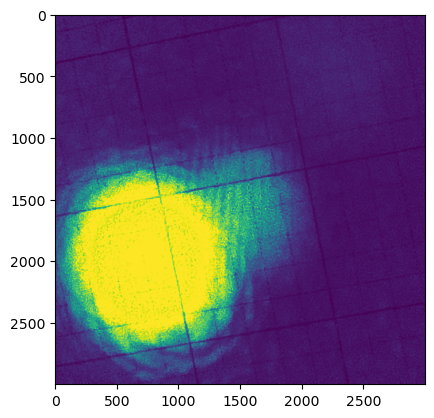

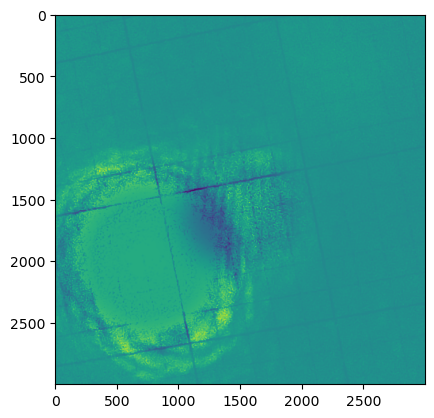

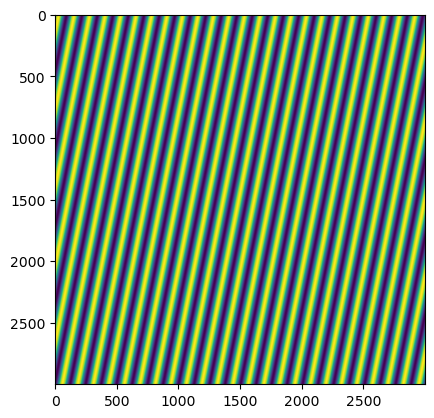

In [109]:
plt.imshow(photos[4])
plt.show()
plt.imshow(photos[4] - beam(760, 1980, 520, 4.5, 0.8) - beam(1500, 1600, 320, 2, 0.45))
plt.show()
plt.imshow(0.5 + 0.5*np.sin(x/20 + y/100))
plt.show()

In [105]:
extent = (-1, 1, -1, 1)

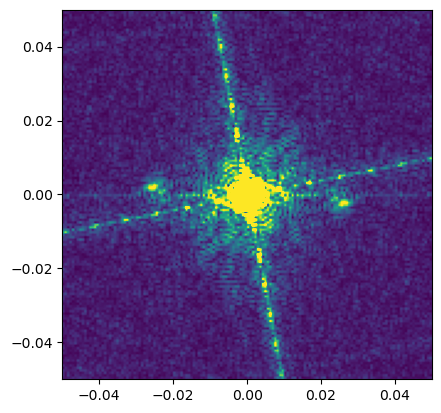

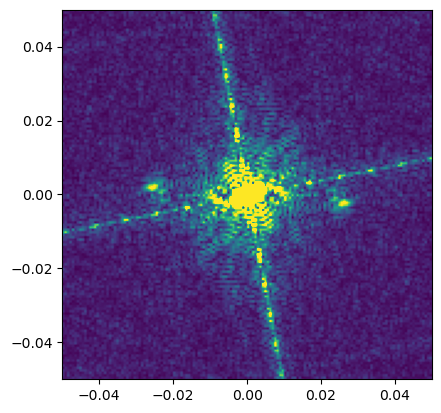

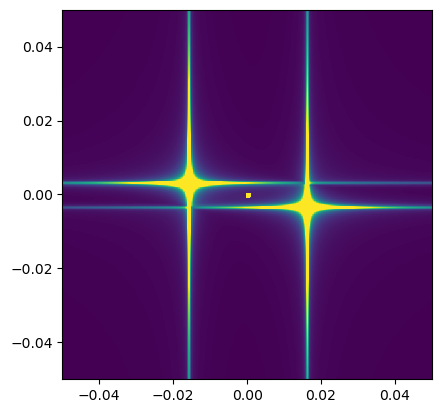

In [119]:
fft = sp.fft.ifftshift(photos[4])
fft = sp.fft.fft2(fft)
fft = sp.fft.fftshift(fft)
plt.imshow(abs(fft), vmax=10000, extent=extent)
plt.xlim(-0.05, 0.05)
plt.ylim(-0.05, 0.05)
plt.show()

fft = sp.fft.ifftshift(photos[4] - beam(760, 1980, 520, 4.5, 0.8) - beam(1500, 1600, 320, 2, 0.45))
fft = sp.fft.fft2(fft)
fft = sp.fft.fftshift(fft)
plt.imshow(abs(fft), vmax=10000, extent=extent)
plt.xlim(-0.05, 0.05)
plt.ylim(-0.05, 0.05)
plt.show()

fft = sp.fft.ifftshift(0.5 + 0.5*np.sin(x/20 + y/100))
fft = sp.fft.fft2(fft)
fft = sp.fft.fftshift(fft)
plt.imshow(abs(fft), vmax=10000, extent=extent)
plt.xlim(-0.05, 0.05)
plt.ylim(-0.05, 0.05)
plt.show()



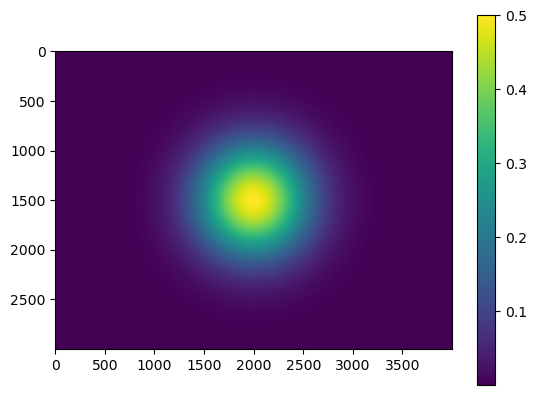

In [31]:



#create data
data = beam((x, y), 2000, 1500, 400, 1, 0.5)

# plot twoD_Gaussian data generated above
plt.figure()
plt.imshow(data.reshape(h, w))
plt.colorbar()